<a href="https://colab.research.google.com/github/seungwoo0714/Beamforming/blob/main/Beamforming_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(0.0, 3.141592653589793)

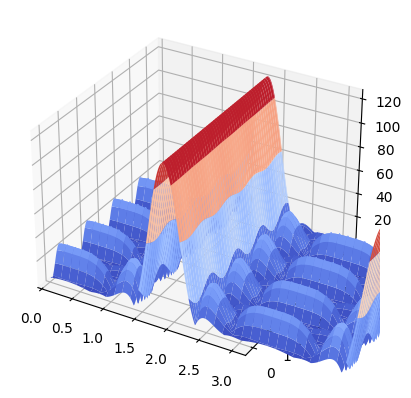

<Figure size 640x480 with 0 Axes>

In [5]:
from math import *
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

th = 15 * (pi/180) # Azimuth Shift
phi = 30 * (pi/180) # Elevation Shift
th_res = 0.01
phi_res = 0.01
theta0 = np.arange(th_res,2*pi,th_res)
phi0 = np.arange(phi_res,2*pi,phi_res)

N = 5
M = 5

AF = [[0 for _ in range(len(phi0))] for _ in range(len(theta0))] # Initialize
f = 28 * (10**9)
c = 3 * (10**8)
l = c/f
d = 0.5 * l
k = 2*pi/l

for p in range(0,len(phi0)):
  for i in range(0,len(theta0)):
    f_psi = 0
    g_psi = 0
    psi = k * d * cos(i * th_res - th) * cos(p*phi_res - phi)
    gamma = k * d * cos(i * th_res - th) * sin(p*phi_res - phi)
    for q in range(0,M):
      for j in range(0, N):
        f_psi = f_psi + complex(cos(j * psi),sin(j * psi))
      g_psi = g_psi + complex(cos(q * gamma),sin(q * gamma))
    h_psi = g_psi * f_psi
    AF[p][i] = abs(h_psi)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
display.clear_output(wait=True)
plt.figure().clear()
X, Y = np.meshgrid(theta0, phi0)
ax.plot_surface(X, Y, np.array(AF), cmap=cm.coolwarm) # inferno
ax.set_xlim(0, pi)